# **Data Diri**
Nama : Ardian Nurcahya \\
Email : ardian.a1gca@gmail.com \\
Domisili : Bandung \\
Tempat, Tanggal Lahir : Bandung, 20 januari 2002 \\
Profesi saat ini : Mahasiswa \\
Institusi : Universitas Padjadjaran \\



# Membuat Model Machine Learning *Image Classification* untuk Mengklasifikasikan Jenis Bunga

### 1. Mengimport pustaka yang diperlukan

In [8]:
import os
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import shutil
from PIL import Image

### 2. Mengintegrasikan Gcolab dengan Gdrive

In [2]:
# mount gdrive
drive.mount('/content/drive')

# Mengubah environtment direktori
%cd /content/drive/My Drive/data

Mounted at /content/drive
/content/drive/My Drive/data


Dataset yang digunakan memiliki 6 kelas dengan resolusi gambar yang beragam, dataset dibuat dengan mengumpulkan beberapa dataset yang tersedia di kaggle kemudian dilakukan penyortiran. berikut merupakan dataset sumber yang digunakan untuk membangun dataset pada proyek ini



```
kaggle datasets download -d sauravagarwal/flower-classification
```


```
kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset
```


```
kaggle datasets download -d marquis03/flower-classification
```


```
kaggle datasets download -d phucthaiv02/flower-image-dataset
```






In [4]:
# mengekstrak dataset yang berada di folder drive
!unzip flower_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/sunflower/93a5478e94.jpg  
  inflating: data/sunflower/93f8b2c5cb.jpg  
  inflating: data/sunflower/94064437_3bec1c07f3_c.jpg  
  inflating: data/sunflower/9408557741_b2cb437f10_c.jpg  
  inflating: data/sunflower/9410186154_465642ed35.jpg  
  inflating: data/sunflower/9427945592_07a2676945_n.jpg  
  inflating: data/sunflower/9431890901_cd11bda584_n.jpg  
  inflating: data/sunflower/9431896325_23bf6e8761.jpg  
  inflating: data/sunflower/9432335346_e298e47713_n.jpg  
  inflating: data/sunflower/9436362241_7f5728d0d8_c.jpg  
  inflating: data/sunflower/9436380581_5ab0733323_c.jpg  
  inflating: data/sunflower/9445830851_e9a126fd1d_n.jpg  
  inflating: data/sunflower/9448615838_04078d09bf_n.jpg  
  inflating: data/sunflower/9460336948_6ae968be93.jpg  
  inflating: data/sunflower/9461693602_710f20904f.jpg  
  inflating: data/sunflower/9473869886_3e7b06907c_c.jpg  
  inflating: data/sunflower/9481563239_01b585b41d_n.jpg  

### 3. Membagi data 80% training dan 20% validasi

In [5]:
# Membuat alamat direktori untuk data training dan validasi
!mkdir train val

# Membuat folder untuk gambar setiap jenis bunga di folder training
!mkdir train/daisy train/dandelion train/iris train/sunflower train/tulip train/wild_rose

# Membuat folder untuk gambar setiap jenis bunga di folder validasi
!mkdir val/daisy val/dandelion val/iris val/sunflower val/tulip val/wild_rose

In [6]:
# Fungsi untuk resize gambar karena data memiliki resolusi beragam
def resize_image(img_path, target_size=(80, 80)):
    img = Image.open(img_path)
    resized_img = img.resize(target_size)
    return resized_img

# Membagi data menjadi 80% training dan 20% validasi
for i in ["daisy", "dandelion", "iris", "sunflower", "tulip", "wild_rose"]:
    source_img_set = os.path.join('data', i)
    train_img_set = os.path.join('train', i)
    validation_image_dir = os.path.join('val', i)
    file_list = os.listdir(source_img_set)  # Mendapatkan list dari semua nama file gambar pada folder awal

    for j in range(len(file_list)):
        source_image_path = os.path.join(source_img_set, file_list[j])  # Mengambil path folder untuk setiap gambar

        # Resize gambar sebelum menyalin
        resized_img = resize_image(source_image_path)

        # Menyalin file berdasarkan jumlahnya, apabila sudah 20% data tercopy ke folder validasi, maka akan pindah ke folder training
        if j < (len(file_list) * 2 / 10):
            copy_destination_path = os.path.join(validation_image_dir, file_list[j])  # Menentukan destinasi folder untuk gambar yang disalin ke folder validasi
            resized_img.save(copy_destination_path)
        else:
            copy_destination_path = os.path.join(train_img_set, file_list[j])  # Menentukan destinasi folder untuk gambar yang disalin ke folder training
            resized_img.save(copy_destination_path)


### 4. Augmentasi data

In [7]:
# Proses augmentasi gambar
train_datagen = ImageDataGenerator( rescale=1./255,         # Rescale nilai gambar untuk mengecilkan ukuran file
                                    rotation_range=10,      # Melakukan rotasi pada gambar secara acak
                                    width_shift_range=0.1,  # Menggeser gambar pada arah horizontal secara acak
                                    height_shift_range=0.1, # Menggeser gambar pada arah vertikal secara acak
                                    horizontal_flip=True,   # Membalik gambar pada arah horizontal (pencerminan)
                                    shear_range = 0.1,      # Melakukan shear secara acak
                                    zoom_range = 0.1,       # Melakukan zoom secara acak
                                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                     rescale=1./255)

In [9]:
# Melakukan load gambar dari directory berdasarkan augmentasi yang telah didefinisikan sebelumnya
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(80, 80),
        batch_size=16,
        classes=["daisy","dandelion","iris","sunflower","tulip","wild_rose"],  # Kelas yang akan diklasifikasi oleh model
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'val',
        target_size=(80, 80),
        batch_size=16,
        classes=["daisy","dandelion","iris","sunflower","tulip","wild_rose"],  # Kelas yang akan diklasifikasi oleh model
        class_mode='categorical')

Found 10966 images belonging to 6 classes.
Found 2746 images belonging to 6 classes.


### 5. Pembuatan model dengan menggunakan sequential dan Convo2D Maxpooling Layer

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax'),

])
model.summary()          # Mengecek informasi mengenai model yang telah dibuat

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

In [11]:
# mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 6. Melakukan pelatihan model

In [12]:
# thresshold untuk akurasi yang diperlukan
akurasi_yang_ditentukan = 0.93

#membuat class untuk menghentikan pelatihan jika threshold tercapai
class CustomEarlyStopping(EarlyStopping):
    def on_epoch_end(self, epoch, logs=None):
        akurasi_saat_ini = logs.get('accuracy')
        val_akurasi_saat_ini = logs.get('val_accuracy')
        if akurasi_saat_ini >= akurasi_yang_ditentukan and val_akurasi_saat_ini >= akurasi_yang_ditentukan:
            print(f"\nval accuracy mencapai ({akurasi_yang_ditentukan}), pelatihan telah berhenti.")
            #menyimpan model
            model.save('img_calssification_model.h5')
            #menghentikan pelatihan
            self.model.stop_training = True
        else:
            super().on_epoch_end(epoch, logs)

custom_early_stopping = CustomEarlyStopping(monitor='val_accuracy', patience=400, mode='max', verbose=1)

history = model.fit(  train_generator,                          # Input dari data training yang telah dibuat
                      steps_per_epoch=32,                       # Jumlah langkah yang dilakukan per epoch
                      epochs=400,                               # Jumlah epoch yang dijalankan
                      validation_data=validation_generator,     # Generator data validasi
                      validation_steps=16,
                      callbacks = [custom_early_stopping],      # Pemanggilan callback, yang digunakan kali ini untuk menyimpan model dan menghentikan pelatihan apabila sudah stagnan
                      verbose=2)                                # Menampilka detail informasi yang diberikan pada pelatihan, 2 memberikan informasi berupa loss, akurasi, dan waktu

Epoch 1/400
32/32 - 27s - loss: 1.7414 - accuracy: 0.2383 - val_loss: 1.6777 - val_accuracy: 0.2891 - 27s/epoch - 832ms/step
Epoch 2/400
32/32 - 4s - loss: 1.6112 - accuracy: 0.3477 - val_loss: 1.4905 - val_accuracy: 0.3633 - 4s/epoch - 112ms/step
Epoch 3/400
32/32 - 5s - loss: 1.3680 - accuracy: 0.4316 - val_loss: 1.3547 - val_accuracy: 0.4492 - 5s/epoch - 141ms/step
Epoch 4/400
32/32 - 3s - loss: 1.2974 - accuracy: 0.4746 - val_loss: 1.1635 - val_accuracy: 0.4844 - 3s/epoch - 102ms/step
Epoch 5/400
32/32 - 4s - loss: 1.1976 - accuracy: 0.5254 - val_loss: 1.3309 - val_accuracy: 0.5078 - 4s/epoch - 115ms/step
Epoch 6/400
32/32 - 4s - loss: 1.3209 - accuracy: 0.4941 - val_loss: 1.3272 - val_accuracy: 0.4102 - 4s/epoch - 118ms/step
Epoch 7/400
32/32 - 4s - loss: 1.2739 - accuracy: 0.4531 - val_loss: 1.2028 - val_accuracy: 0.5273 - 4s/epoch - 120ms/step
Epoch 8/400
32/32 - 3s - loss: 1.2050 - accuracy: 0.5625 - val_loss: 1.0301 - val_accuracy: 0.6250 - 3s/epoch - 107ms/step
Epoch 9/400
32

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 7. Menampilkan performa model dan menampilkan plot

In [13]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Menampilkan hasil akurasi training dan test
print(f"Training Accuracy: {round(train_accuracy[-1]*100,2)} %")
print(f'Validation Accuracy: {round(val_accuracy[-1]*100,2)} %')

Training Accuracy: 93.36 %
Validation Accuracy: 93.36 %


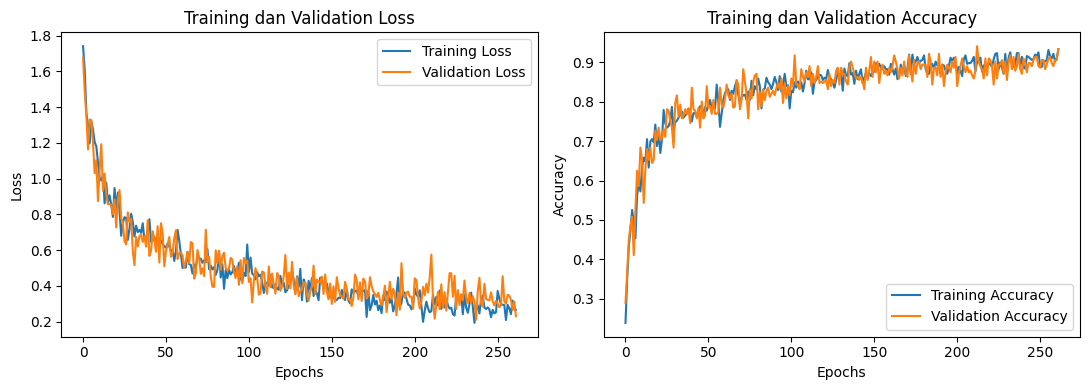

In [16]:
# Membuat Plot kurva loss
plt.figure(figsize=(11,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training dan Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Membuat Plot kurva akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training dan Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Menampilkan plot
plt.tight_layout()  # Untuk memberikan padding yang memadai antara subplot
plt.show()


### 8. Menyimpan model ke dalam format TFlite

In [15]:
# Menghilangkan warning
warnings.filterwarnings('ignore')

# Simpan model ke dalam format TF-Lite menggunakan keras model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('image_classification_kerasmodel.tflite', 'wb') as f:
    f.write(tflite_model)